In [1]:
import argparse,os,logging,psutil,time
from joblib import Parallel,delayed
from sklearn.model_selection import train_test_split
import shutil
#import utils file
%run utils.ipynb
%run make_graph2vec_corpus.ipynb
%run train_utils_new.ipynb
%run classify_new.ipynb

logger = logging.getLogger()
logger.setLevel("INFO")

/home/ipsita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ipsita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ipsita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ipsita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# Set it manually for now
corpus_dir = "/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag"
output_dir = "/home/ipsita/BTP/graph2vec/embeddings"
batch_size = 128
epochs = 400 #4 win_size = 1 74%
embedding_size = 1024
num_negsample = 10
learning_rate = 0.3
wlk_h = 3
label_filed_name = 'Label'
class_labels_fname = '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag.Labels'
win_size = 1
concat_flag = 0

wl_extn = 'g2v'+str(wlk_h)    # wlk_h is height to be considered

assert os.path.exists(corpus_dir), "File {} does not exist".format(corpus_dir)
assert os.path.exists(output_dir), "Dir {} does not exist".format(output_dir)

In [3]:
graph_files = get_files(dirname=corpus_dir, extn='.gexf', max_files=0)
logging.info('Loaded {} graph file names form {}'.format(len(graph_files),corpus_dir))
graph_files[:5]

INFO:root:Loaded 188 graph file names form /home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag


['/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/0.gexf',
 '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/1.gexf',
 '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/10.gexf',
 '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/100.gexf',
 '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/101.gexf']

In [4]:
t0 = time.time()
wlk_relabel_and_dump_memory_version(graph_files, max_h=wlk_h, node_label_attr_name=label_filed_name)
logging.info('dumped sg2vec sentences in {} sec.'.format(time.time() - t0))

loaded all graphs in 0.62 sec
initial relabeling done in 0.03 sec
WL iteration 1 done in 0.03 sec.
num of WL rooted subgraphs in iter 1 is 33
WL iteration 2 done in 0.03 sec.
num of WL rooted subgraphs in iter 2 is 174
WL iteration 3 done in 0.03 sec.
num of WL rooted subgraphs in iter 3 is 572


INFO:root:dumped sg2vec sentences in 0.9042682647705078 sec.


dumped sg2vec sentences in 0.16


In [5]:
Y = list(range(0, len(graph_files)))  ###  for now ########
X = [g+"."+wl_extn for g in graph_files]

#Y = np.array(get_class_labels(wlk_files, class_labels_fname))
graph_to_class_label_map = {l.split()[0].split('.')[0]: int(l.split()[1].strip()) for l in open (class_labels_fname)}

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
#print(np.shape(Xtrain)," ",np.shape(Ytrain)," ",np.shape(Xtest)," ",np.shape(Ytest))

print('Xtrain shape', np.shape(Xtrain))
labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in Xtrain]
Ytrain = np.array(labels)
print('Ytrain shape', np.shape(Ytrain))

print(Xtrain[:5])
print(Ytrain[:5])

print('Xtest shape', np.shape(Xtest))
labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in Xtest] 
Ytest = np.array(labels)
print('Ytest shape', np.shape(Ytest))
print()
print(Xtest[:5])
print(Ytest[:5])

Xtrain shape (125,)
Ytrain shape (125,)
['/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/186.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/137.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/133.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/22.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/14.gexf.g2v3']
[-1 -1 -1  1  1]
Xtest shape (63,)
Ytest shape (63,)

['/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/134.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/71.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/27.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/169.gexf.g2v3', '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag/113.gexf.g2v3']
[-1  1  1 -1  1]


In [7]:
#embedding_fname = train_skipgram(corpus_dir, wl_extn, learning_rate, win_size, concat_flag, Xtrain, embedding_size, num_negsample, epochs, batch_size, output_dir)

## Testing time

In [8]:
#embedding_fname_test = test_skipgram(corpus_dir, wl_extn, learning_rate, win_size, concat_flag, Xtest, embedding_size, num_negsample, epochs, batch_size, output_dir)

In [ ]:
#embedding_fname = "/home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings.txt"
#embedding_fname_test = "/home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings_test.txt"

In [11]:
#a = perform_classification(Xtrain, Ytrain, Xtest, Ytest, wl_extn, embedding_fname, embedding_fname_test, class_labels_fname)

In [ ]:
a

## Cross Validation

In [ ]:
params = [1, 2, 3, 4, 5]
A = []
checkpoint_path = '/home/ipsita/BTP/graph2vec/model_ckpt'

for w in params:
    t0 = time.time()
    
    win_size = w
    cpath = checkpoint_path + "/" + str(w)
    print("cpath = ", cpath)
    print("********* For window size", win_size,"**********")
    Y = list(range(0, len(graph_files)))
    X = [g+"."+wl_extn for g in graph_files]

    graph_to_class_label_map = {l.split()[0].split('.')[0]: int(l.split()[1].strip()) for l in open (class_labels_fname)}

    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

    print('Xtrain shape', np.shape(Xtrain))
    labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in Xtrain]
    Ytrain = np.array(labels)
    print('Ytrain shape', np.shape(Ytrain))

    print('Xtest shape', np.shape(Xtest))
    labels = [graph_to_class_label_map[os.path.basename(g).split('.')[0]] for g in Xtest] 
    Ytest = np.array(labels)
    print('Ytest shape', np.shape(Ytest))
    
    embedding_fname = train_skipgram(corpus_dir, wl_extn, learning_rate, win_size, concat_flag, 
                                     cpath, Xtrain, embedding_size, num_negsample, epochs, batch_size, output_dir)

    embedding_fname_test = test_skipgram(corpus_dir, wl_extn, learning_rate, win_size, concat_flag, 
                                         cpath, Xtest, embedding_size, num_negsample, epochs, batch_size, output_dir)

    logging.info('Trained the skipgram in {} sec.'.format(round(time.time() -t0, 2)))
    
    a = perform_classification(Xtrain, Ytrain, Xtest, Ytest, wl_extn, embedding_fname, 
                               embedding_fname_test, class_labels_fname)
    
    print("Accuracy for win size", win_size, "is", a)
    A.append(a)
    #shutil.rmtree('/home/ipsita/BTP/graph2vec/model_ckpt')
    #time.sleep(5)
    #os.mkdir('/home/ipsita/BTP/graph2vec/model_ckpt')
    os.remove(embedding_fname)
    os.remove(embedding_fname_test)

INFO:root:Initializing SKIPGRAM...


cpath =  /home/ipsita/BTP/graph2vec/model_ckpt/1
********* For window size 1 **********
Xtrain shape (125,)
Ytrain shape (125,)
Xtest shape (63,)
Ytest shape (63,)


INFO:root:number of graphs: 125
INFO:root:subgraph vocabulary size: 626
INFO:root:total number of subgraphs to be trained: 9021


number of graphs: 125
subgraph vocabulary size: 626
total number of subgraphs to be trained: 9021
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Shape final embed [128, 2048]


INFO:root:#########################   Epoch: 0 :  24.166217, 1.17 sec.  #####################
INFO:root:#########################   Epoch: 1 :  13.254845, 0.50 sec.  #####################
INFO:root:#########################   Epoch: 2 :  9.590168, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 3 :  8.229191, 0.48 sec.  #####################
INFO:root:#########################   Epoch: 4 :  5.885884, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 5 :  4.531589, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 6 :  3.282244, 0.44 sec.  #####################
INFO:root:#########################   Epoch: 7 :  3.714291, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 8 :  2.708846, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 9 :  2.717685, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 10 :  2.733755, 0.42 se

INFO:root:#########################   Epoch: 88 :  1.183506, 0.50 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.160139, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.199191, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.200241, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.175322, 0.50 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.157092, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.162926, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.186318, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.203716, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.191000, 0.49 sec.  #####################
INFO:root:#########################   Epoch: 98 :  1.154975,

INFO:root:#########################   Epoch: 175 :  1.027759, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.079766, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.040024, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.089831, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.050021, 0.39 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.075019, 0.39 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.031597, 0.37 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.031009, 0.38 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.050529, 0.37 sec.  #####################
INFO:root:#########################   Epoch: 184 :  1.049151, 0.38 sec.  #####################
INFO:root:#########################   Epoch: 185 :

INFO:root:#########################   Epoch: 262 :  1.012909, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 263 :  0.972095, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 264 :  0.974782, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.001656, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 266 :  0.982089, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.006441, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 268 :  0.987625, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 269 :  0.988052, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 270 :  0.981324, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 271 :  0.975826, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 272 :

INFO:root:#########################   Epoch: 349 :  0.945682, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 350 :  0.949671, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 351 :  0.960978, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 352 :  0.949172, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 353 :  0.940482, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 354 :  0.951607, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 355 :  0.939586, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 356 :  0.922847, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 357 :  0.937011, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 358 :  0.963920, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 359 :

Model saved in path: /home/ipsita/BTP/graph2vec/model_ckpt/1/model1.ckpt


INFO:root:Completed writing the final embeddings, pls check file: /home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings.txt for the same
INFO:root:Initializing TEST SKIPGRAM...


path1 /home/ipsita/BTP/graph2vec/model_ckpt/1/model1.ckpt.meta
path2 /home/ipsita/BTP/graph2vec/model_ckpt/1/model1.ckpt
Graph to infer = 63
subgraph embedding size [626, 1024]
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/1/model1.ckpt


INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/1/model1.ckpt
INFO:root:#########################   Epoch: 0 :  1.542354, 0.66 sec.  #####################
INFO:root:#########################   Epoch: 1 :  1.438557, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 2 :  1.433764, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 3 :  1.369114, 0.32 sec.  #####################
INFO:root:#########################   Epoch: 4 :  1.521458, 0.22 sec.  #####################
INFO:root:#########################   Epoch: 5 :  1.471322, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 6 :  1.428019, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 7 :  1.452695, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 8 :  1.455249, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 9 :  1.383379, 0.18 sec.

INFO:root:#########################   Epoch: 87 :  1.192771, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 88 :  1.262947, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.295844, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.239515, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.287273, 0.29 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.258179, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.264991, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.238903, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.260076, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.186032, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.269129,

INFO:root:#########################   Epoch: 174 :  1.200951, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 175 :  1.174092, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.206829, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.239822, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.169646, 0.29 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.229464, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.234588, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.220957, 0.23 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.167113, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.217823, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 184 :

INFO:root:#########################   Epoch: 261 :  1.126306, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 262 :  1.183345, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 263 :  1.120093, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 264 :  1.178140, 0.30 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.204930, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 266 :  1.110966, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.118036, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 268 :  1.133763, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 269 :  1.106213, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 270 :  1.197422, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 271 :

INFO:root:#########################   Epoch: 348 :  1.135654, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 349 :  1.125763, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 350 :  1.146796, 0.33 sec.  #####################
INFO:root:#########################   Epoch: 351 :  1.087382, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 352 :  1.149184, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 353 :  1.136996, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 354 :  1.094271, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 355 :  1.084584, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 356 :  1.074388, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 357 :  1.158270, 0.28 sec.  #####################
INFO:root:#########################   Epoch: 358 :

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.6s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.5238095238095238
INFO:root:             precision    recall  f1-score   support

         -1       0.40      1.00      0.57        20
          1       1.00      0.30      0.46        43

avg / total       0.81      0.52      0.50        63

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 125
INFO:root:subgraph vocabulary size: 619
INFO:root:total number of subgraphs to be trained: 8933


Accuracy for win size 1 is 0.5238095238095238
cpath =  /home/ipsita/BTP/graph2vec/model_ckpt/2
********* For window size 2 **********
Xtrain shape (125,)
Ytrain shape (125,)
Xtest shape (63,)
Ytest shape (63,)
number of graphs: 125
subgraph vocabulary size: 619
total number of subgraphs to be trained: 8933
Shape final embed [128, 2048]


INFO:root:#########################   Epoch: 0 :  20.399157, 0.71 sec.  #####################
INFO:root:#########################   Epoch: 1 :  13.097769, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 2 :  9.412339, 0.57 sec.  #####################
INFO:root:#########################   Epoch: 3 :  6.061722, 0.58 sec.  #####################
INFO:root:#########################   Epoch: 4 :  4.895625, 0.59 sec.  #####################
INFO:root:#########################   Epoch: 5 :  4.459646, 0.59 sec.  #####################
INFO:root:#########################   Epoch: 6 :  3.771058, 0.60 sec.  #####################
INFO:root:#########################   Epoch: 7 :  3.267034, 0.59 sec.  #####################
INFO:root:#########################   Epoch: 8 :  2.474261, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 9 :  2.642556, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 10 :  1.896669, 0.56 se

INFO:root:#########################   Epoch: 88 :  0.899035, 0.59 sec.  #####################
INFO:root:#########################   Epoch: 89 :  0.867777, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 90 :  0.902738, 0.58 sec.  #####################
INFO:root:#########################   Epoch: 91 :  0.903969, 0.59 sec.  #####################
INFO:root:#########################   Epoch: 92 :  0.906883, 0.58 sec.  #####################
INFO:root:#########################   Epoch: 93 :  0.890482, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 94 :  0.907259, 0.58 sec.  #####################
INFO:root:#########################   Epoch: 95 :  0.880213, 0.57 sec.  #####################
INFO:root:#########################   Epoch: 96 :  0.879042, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 97 :  0.864914, 0.61 sec.  #####################
INFO:root:#########################   Epoch: 98 :  0.887223,

INFO:root:#########################   Epoch: 175 :  0.794214, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 176 :  0.812469, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 177 :  0.787401, 0.57 sec.  #####################
INFO:root:#########################   Epoch: 178 :  0.793716, 0.58 sec.  #####################
INFO:root:#########################   Epoch: 179 :  0.814238, 0.57 sec.  #####################
INFO:root:#########################   Epoch: 180 :  0.797431, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 181 :  0.806293, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 182 :  0.798172, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 183 :  0.787212, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 184 :  0.794277, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 185 :

INFO:root:#########################   Epoch: 262 :  0.761478, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 263 :  0.765586, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 264 :  0.756424, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 265 :  0.728677, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 266 :  0.741600, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 267 :  0.741879, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 268 :  0.760811, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 269 :  0.747817, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 270 :  0.769795, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 271 :  0.767393, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 272 :

INFO:root:#########################   Epoch: 349 :  0.733543, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 350 :  0.719163, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 351 :  0.700138, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 352 :  0.728293, 0.40 sec.  #####################
INFO:root:#########################   Epoch: 353 :  0.725140, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 354 :  0.722228, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 355 :  0.680025, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 356 :  0.722250, 0.42 sec.  #####################
INFO:root:#########################   Epoch: 357 :  0.713631, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 358 :  0.719377, 0.41 sec.  #####################
INFO:root:#########################   Epoch: 359 :

Model saved in path: /home/ipsita/BTP/graph2vec/model_ckpt/2/model2.ckpt


INFO:root:Completed writing the final embeddings, pls check file: /home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings.txt for the same
INFO:root:Initializing TEST SKIPGRAM...


path1 /home/ipsita/BTP/graph2vec/model_ckpt/2/model2.ckpt.meta
path2 /home/ipsita/BTP/graph2vec/model_ckpt/2/model2.ckpt
Graph to infer = 63
subgraph embedding size [619, 1024]
INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/2/model2.ckpt


INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/2/model2.ckpt
INFO:root:#########################   Epoch: 0 :  1.290511, 0.23 sec.  #####################
INFO:root:#########################   Epoch: 1 :  1.235281, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 2 :  1.238912, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 3 :  1.291542, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 4 :  1.271538, 1.18 sec.  #####################
INFO:root:#########################   Epoch: 5 :  1.295122, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 6 :  1.297291, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 7 :  1.237286, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 8 :  1.281538, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 9 :  1.278873, 0.15 sec.

INFO:root:#########################   Epoch: 87 :  1.134277, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 88 :  1.185205, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.158347, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.232396, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.150667, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.175281, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.194782, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.182618, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.171008, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.160563, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.147829,

INFO:root:#########################   Epoch: 174 :  1.142229, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 175 :  1.127461, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.125359, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.101834, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.125154, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.157381, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.090956, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.120121, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.109773, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.114875, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 184 :

INFO:root:#########################   Epoch: 261 :  1.118440, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 262 :  1.132435, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 263 :  1.113133, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 264 :  1.107172, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.144496, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 266 :  1.101521, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.101583, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 268 :  1.088674, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 269 :  1.091118, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 270 :  1.141252, 0.33 sec.  #####################
INFO:root:#########################   Epoch: 271 :

INFO:root:#########################   Epoch: 348 :  1.070666, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 349 :  1.072838, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 350 :  1.110460, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 351 :  1.076700, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 352 :  1.068162, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 353 :  1.101341, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 354 :  1.011777, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 355 :  1.143928, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 356 :  1.021137, 0.15 sec.  #####################
INFO:root:#########################   Epoch: 357 :  1.056977, 0.26 sec.  #####################
INFO:root:#########################   Epoch: 358 :

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.6666666666666666
INFO:root:             precision    recall  f1-score   support

         -1       0.85      0.37      0.51        30
          1       0.62      0.94      0.75        33

avg / total       0.73      0.67      0.63        63

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 125
INFO:root:subgraph vocabulary size: 644
INFO:root:total number of subgraphs to be trained: 9045


Accuracy for win size 2 is 0.6666666666666666
cpath =  /home/ipsita/BTP/graph2vec/model_ckpt/3
********* For window size 3 **********
Xtrain shape (125,)
Ytrain shape (125,)
Xtest shape (63,)
Ytest shape (63,)
number of graphs: 125
subgraph vocabulary size: 644
total number of subgraphs to be trained: 9045
Shape final embed [128, 2048]


INFO:root:#########################   Epoch: 0 :  20.639162, 0.60 sec.  #####################
INFO:root:#########################   Epoch: 1 :  12.720057, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 2 :  9.740147, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 3 :  6.284794, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 4 :  4.874995, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 5 :  4.271199, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 6 :  3.429551, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 7 :  3.167472, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 8 :  3.223034, 0.49 sec.  #####################
INFO:root:#########################   Epoch: 9 :  2.486467, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 10 :  2.537293, 0.46 se

INFO:root:#########################   Epoch: 88 :  0.961130, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 89 :  0.957130, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 90 :  0.988460, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 91 :  0.985737, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 92 :  0.974283, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 93 :  0.970785, 0.45 sec.  #####################
INFO:root:#########################   Epoch: 94 :  0.999944, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 95 :  0.962172, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.018102, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 97 :  0.990131, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 98 :  0.998466,

INFO:root:#########################   Epoch: 175 :  0.870920, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 176 :  0.885003, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 177 :  0.882108, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 178 :  0.890894, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 179 :  0.883532, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 180 :  0.891509, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 181 :  0.886224, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 182 :  0.875007, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 183 :  0.909780, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 184 :  0.869716, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 185 :

INFO:root:#########################   Epoch: 262 :  0.829445, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 263 :  0.857871, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 264 :  0.820847, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 265 :  0.870193, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 266 :  0.843789, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 267 :  0.845676, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 268 :  0.845702, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 269 :  0.844326, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 270 :  0.842901, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 271 :  0.838704, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 272 :

INFO:root:#########################   Epoch: 349 :  0.826680, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 350 :  0.794578, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 351 :  0.819223, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 352 :  0.832161, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 353 :  0.812424, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 354 :  0.814284, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 355 :  0.829704, 0.46 sec.  #####################
INFO:root:#########################   Epoch: 356 :  0.810108, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 357 :  0.800366, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 358 :  0.825437, 0.47 sec.  #####################
INFO:root:#########################   Epoch: 359 :

Model saved in path: /home/ipsita/BTP/graph2vec/model_ckpt/3/model3.ckpt


INFO:root:Completed writing the final embeddings, pls check file: /home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings.txt for the same
INFO:root:Initializing TEST SKIPGRAM...


path1 /home/ipsita/BTP/graph2vec/model_ckpt/3/model3.ckpt.meta
path2 /home/ipsita/BTP/graph2vec/model_ckpt/3/model3.ckpt
Graph to infer = 63
subgraph embedding size [644, 1024]
INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/3/model3.ckpt


INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/3/model3.ckpt
INFO:root:#########################   Epoch: 0 :  1.262087, 0.25 sec.  #####################
INFO:root:#########################   Epoch: 1 :  1.136146, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 2 :  1.225957, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 3 :  1.143527, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 4 :  1.181077, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 5 :  1.176696, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 6 :  1.207930, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 7 :  1.194411, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 8 :  1.216127, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 9 :  1.207205, 0.33 sec.

INFO:root:#########################   Epoch: 87 :  1.129194, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 88 :  1.127126, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.115025, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.151079, 0.32 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.101935, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.107012, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.126170, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.182358, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.108209, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.115676, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.117670,

INFO:root:#########################   Epoch: 174 :  1.088755, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 175 :  1.104355, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.053713, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.160778, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.106770, 0.33 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.115679, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.149426, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.110652, 0.23 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.153054, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.136570, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 184 :

INFO:root:#########################   Epoch: 261 :  1.041337, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 262 :  1.011395, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 263 :  1.065804, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 264 :  1.077310, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.026112, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 266 :  1.103236, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.045383, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 268 :  1.083018, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 269 :  1.033229, 0.31 sec.  #####################
INFO:root:#########################   Epoch: 270 :  1.090875, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 271 :

INFO:root:#########################   Epoch: 348 :  1.027703, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 349 :  1.028952, 0.32 sec.  #####################
INFO:root:#########################   Epoch: 350 :  1.030692, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 351 :  1.046874, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 352 :  1.059721, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 353 :  1.013291, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 354 :  1.047069, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 355 :  1.096299, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 356 :  1.084444, 0.20 sec.  #####################
INFO:root:#########################   Epoch: 357 :  1.055195, 0.16 sec.  #####################
INFO:root:#########################   Epoch: 358 :

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.6507936507936508
INFO:root:             precision    recall  f1-score   support

         -1       0.62      0.38      0.48        26
          1       0.66      0.84      0.74        37

avg / total       0.65      0.65      0.63        63

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 125
INFO:root:subgraph vocabulary size: 647
INFO:root:total number of subgraphs to be trained: 9125


Accuracy for win size 3 is 0.6507936507936508
cpath =  /home/ipsita/BTP/graph2vec/model_ckpt/4
********* For window size 4 **********
Xtrain shape (125,)
Ytrain shape (125,)
Xtest shape (63,)
Ytest shape (63,)
number of graphs: 125
subgraph vocabulary size: 647
total number of subgraphs to be trained: 9125
Shape final embed [128, 2048]


INFO:root:#########################   Epoch: 0 :  20.882109, 0.66 sec.  #####################
INFO:root:#########################   Epoch: 1 :  11.233312, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 2 :  8.846678, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 3 :  6.998561, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 4 :  6.541015, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 5 :  5.418284, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 6 :  4.808740, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 7 :  4.143892, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 8 :  2.967714, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 9 :  3.177357, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 10 :  2.897049, 0.56 se

INFO:root:#########################   Epoch: 88 :  1.392746, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.342459, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.374784, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.354482, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.411670, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.345950, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.373049, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.347643, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.340924, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.364582, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 98 :  1.360359,

INFO:root:#########################   Epoch: 175 :  1.245185, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.193656, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.234199, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.199358, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.203925, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.140294, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.212595, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.213106, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.235376, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 184 :  1.217027, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 185 :

INFO:root:#########################   Epoch: 262 :  1.157692, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 263 :  1.163122, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 264 :  1.173555, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.158244, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 266 :  1.156009, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.178926, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 268 :  1.135352, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 269 :  1.156960, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 270 :  1.170871, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 271 :  1.164255, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 272 :

INFO:root:#########################   Epoch: 349 :  1.118850, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 350 :  1.097485, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 351 :  1.122836, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 352 :  1.127114, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 353 :  1.141215, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 354 :  1.118828, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 355 :  1.115723, 0.51 sec.  #####################
INFO:root:#########################   Epoch: 356 :  1.154845, 0.52 sec.  #####################
INFO:root:#########################   Epoch: 357 :  1.131427, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 358 :  1.085527, 0.53 sec.  #####################
INFO:root:#########################   Epoch: 359 :

Model saved in path: /home/ipsita/BTP/graph2vec/model_ckpt/4/model4.ckpt


INFO:root:Completed writing the final embeddings, pls check file: /home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_400_lr_0.3_embeddings.txt for the same
INFO:root:Initializing TEST SKIPGRAM...


path1 /home/ipsita/BTP/graph2vec/model_ckpt/4/model4.ckpt.meta
path2 /home/ipsita/BTP/graph2vec/model_ckpt/4/model4.ckpt
Graph to infer = 63
subgraph embedding size [647, 1024]
INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/4/model4.ckpt


INFO:tensorflow:Restoring parameters from /home/ipsita/BTP/graph2vec/model_ckpt/4/model4.ckpt
INFO:root:#########################   Epoch: 0 :  1.484962, 0.27 sec.  #####################
INFO:root:#########################   Epoch: 1 :  1.475967, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 2 :  1.518447, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 3 :  1.493841, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 4 :  1.468851, 0.19 sec.  #####################
INFO:root:#########################   Epoch: 5 :  1.527568, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 6 :  1.564269, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 7 :  1.546270, 0.18 sec.  #####################
INFO:root:#########################   Epoch: 8 :  1.519373, 0.31 sec.  #####################
INFO:root:#########################   Epoch: 9 :  1.474370, 0.17 sec.

INFO:root:#########################   Epoch: 87 :  1.369133, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 88 :  1.455982, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.376339, 0.33 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.388715, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.410496, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.312929, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.341357, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.386803, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.487465, 0.24 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.339328, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.335130,

INFO:root:#########################   Epoch: 174 :  1.293410, 0.24 sec.  #####################
INFO:root:#########################   Epoch: 175 :  1.341341, 0.20 sec.  #####################
INFO:root:#########################   Epoch: 176 :  1.336419, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.336155, 0.31 sec.  #####################
INFO:root:#########################   Epoch: 178 :  1.362577, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.313268, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.362106, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.354315, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.346328, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.302967, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 184 :

INFO:root:#########################   Epoch: 261 :  1.288585, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 262 :  1.364041, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 263 :  1.259706, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 264 :  1.301058, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 265 :  1.296441, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 266 :  1.306533, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 267 :  1.346228, 0.31 sec.  #####################
INFO:root:#########################   Epoch: 268 :  1.324292, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 269 :  1.303389, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 270 :  1.351143, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 271 :

INFO:root:#########################   Epoch: 348 :  1.292380, 0.20 sec.  #####################
INFO:root:#########################   Epoch: 349 :  1.279258, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 350 :  1.312762, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 351 :  1.311382, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 352 :  1.292309, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 353 :  1.401312, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 354 :  1.281867, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 355 :  1.293200, 0.33 sec.  #####################
INFO:root:#########################   Epoch: 356 :  1.306098, 0.22 sec.  #####################
INFO:root:#########################   Epoch: 357 :  1.294128, 0.17 sec.  #####################
INFO:root:#########################   Epoch: 358 :

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.7142857142857143
INFO:root:             precision    recall  f1-score   support

         -1       0.58      0.83      0.68        23
          1       0.87      0.65      0.74        40

avg / total       0.76      0.71      0.72        63

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 125
INFO:root:subgraph vocabulary size: 610
INFO:root:total number of subgraphs to be trained: 9105


Accuracy for win size 4 is 0.7142857142857143
cpath =  /home/ipsita/BTP/graph2vec/model_ckpt/5
********* For window size 5 **********
Xtrain shape (125,)
Ytrain shape (125,)
Xtest shape (63,)
Ytest shape (63,)
number of graphs: 125
subgraph vocabulary size: 610
total number of subgraphs to be trained: 9105
Shape final embed [128, 2048]


INFO:root:#########################   Epoch: 0 :  21.594603, 0.70 sec.  #####################
INFO:root:#########################   Epoch: 1 :  13.518338, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 2 :  8.048396, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 3 :  6.711047, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 4 :  6.156096, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 5 :  4.463699, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 6 :  3.012251, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 7 :  3.421241, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 8 :  3.038699, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 9 :  2.820323, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 10 :  2.351772, 0.55 se

INFO:root:#########################   Epoch: 88 :  1.101352, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 89 :  1.106326, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 90 :  1.083521, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 91 :  1.127819, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 92 :  1.058080, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 93 :  1.117510, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 94 :  1.073618, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 95 :  1.095691, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 96 :  1.085726, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 97 :  1.104573, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 98 :  1.130126,

INFO:root:#########################   Epoch: 175 :  1.028740, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 176 :  0.961825, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 177 :  1.027274, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 178 :  0.974824, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 179 :  1.016552, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 180 :  1.010727, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 181 :  1.023157, 0.55 sec.  #####################
INFO:root:#########################   Epoch: 182 :  1.036123, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 183 :  1.006133, 0.56 sec.  #####################
INFO:root:#########################   Epoch: 184 :  0.989899, 0.54 sec.  #####################
INFO:root:#########################   Epoch: 185 :

In [9]:
A

[0.47619047619047616, 0.6190476190476191]

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 188
INFO:root:subgraph vocabulary size: 787
INFO:root:total number of subgraphs to be trained: 13485


Shape final embed [100, 2048]


INFO:root:Epoch: 0 : Average loss for step: 100 : 22.278061
INFO:root:#########################   Epoch: 0 :  20.423104, 0.85 sec.  #####################
INFO:root:Epoch: 1 : Average loss for step: 100 : 11.280827
INFO:root:#########################   Epoch: 1 :  10.402936, 0.68 sec.  #####################
INFO:root:Epoch: 2 : Average loss for step: 100 : 6.463301
INFO:root:#########################   Epoch: 2 :  6.395821, 0.61 sec.  #####################
INFO:root:Epoch: 3 : Average loss for step: 100 : 5.425781
INFO:root:#########################   Epoch: 3 :  5.350180, 0.61 sec.  #####################
INFO:root:Epoch: 4 : Average loss for step: 100 : 3.621061
INFO:root:#########################   Epoch: 4 :  3.586192, 0.58 sec.  #####################
INFO:root:Write the matrix to a word2vec format file
INFO:root:Completed writing the final embeddings, pls check file: /home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_5_lr_0.3_embeddings.txt for the same
INFO:root:Trained t

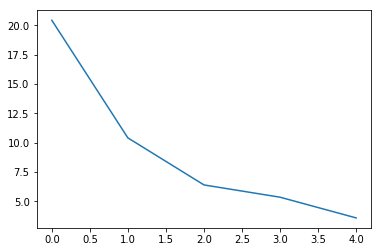

In [89]:
t0 = time.time()
embedding_fname = train_skipgram(corpus_dir, wl_extn, learning_rate, win_size, concat_flag, embedding_size, num_negsample,
                                 epochs, batch_size, output_dir)
logging.info('Trained the skipgram model in {} sec.'.format(round(time.time()-t0, 2)))

In [90]:
perform_classification (corpus_dir, wl_extn, embedding_fname, class_labels_fname)

INFO:root:Y (label) matrix shape: (188,)
INFO:root:Train and Test matrix shapes: (169, 2048), (19, 2048), (169,), (19,) 


X shape (188, 2048)
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.8947368421052632
INFO:root:             precision    recall  f1-score   support

         -1       0.67      1.00      0.80         4
          1       1.00      0.87      0.93        15

avg / total       0.93      0.89      0.90        19



0.8947368421052632

# To run many time

In [35]:
# These parts need not be repeated

####################### set parametrs #######################################
corpus_dir = "/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag"
output_dir = "/home/ipsita/BTP/graph2vec/embeddings"
batch_size = 128
epochs = 1000
embedding_size = 1024
num_negsample = 10
learning_rate = 0.3
wlk_h = 3
label_filed_name = 'Label'
class_labels_fname = '/home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag.Labels'

wl_extn = 'g2v'+str(wlk_h)    # wlk_h is height to be considered

assert os.path.exists(corpus_dir), "File {} does not exist".format(corpus_dir)
assert os.path.exists(output_dir), "Dir {} does not exist".format(output_dir)

######################## load graphs from corpus ###############################
graph_files = get_files(dirname=corpus_dir, extn='.gexf', max_files=0)
logging.info('Loaded {} graph file names form {}'.format(len(graph_files),corpus_dir))

######################## make corpus files #####################################
t0 = time.time()
wlk_relabel_and_dump_memory_version(graph_files, max_h=wlk_h, node_label_attr_name=label_filed_name)
logging.info('dumped sg2vec sentences in {} sec.'.format(time.time() - t0))

INFO:root:Loaded 188 graph file names form /home/ipsita/BTP/graph2vec/data/kdd_datasets/mutag
INFO:root:dumped sg2vec sentences in 0.7712142467498779 sec.


loaded all graphs in 0.65 sec
initial relabeling done in 0.03 sec
WL iteration 1 done in 0.03 sec.
num of WL rooted subgraphs in iter 1 is 33
WL iteration 2 done in 0.03 sec.
num of WL rooted subgraphs in iter 2 is 174
WL iteration 3 done in 0.04 sec.
num of WL rooted subgraphs in iter 3 is 572
dumped sg2vec sentences in 0.0


In [36]:
total_acc = []
fname = "/home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_1000_lr_0.3_embeddings.txt"

for i in range(0, 1):
    
    if os.path.isfile(fname):
        os.remove(fname);

    ######################### training ##############################################
    t0 = time.time()
    embedding_fname = train_skipgram(corpus_dir, wl_extn, learning_rate, embedding_size, num_negsample,
                                     epochs, batch_size, output_dir)
    print(embedding_fname)
    logging.info('Trained the skipgram model in {} sec.'.format(round(time.time()-t0, 2)))
    
    ######################## classify ###############################################
    a = perform_classification (corpus_dir, wl_extn, embedding_fname, class_labels_fname)
    print('i=',i,'accuracy=',a)
    total_acc.append(a)
    

INFO:root:Initializing SKIPGRAM...
INFO:root:number of graphs: 188
INFO:root:subgraph vocabulary size: 787
INFO:root:total number of subgraphs to be trained: 13485
INFO:root:#########################   Epoch: 0 :  19.721200, 0.91 sec.  #####################
INFO:root:#########################   Epoch: 1 :  10.679841, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 2 :  7.999816, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 3 :  5.720646, 0.71 sec.  #####################
INFO:root:#########################   Epoch: 4 :  4.270865, 0.82 sec.  #####################
INFO:root:#########################   Epoch: 5 :  4.251593, 0.72 sec.  #####################
INFO:root:#########################   Epoch: 6 :  3.138256, 0.94 sec.  #####################
INFO:root:#########################   Epoch: 7 :  2.626400, 0.81 sec.  #####################
INFO:root:#########################   Epoch: 8 :  2.166890, 0.87 sec.  ###################

INFO:root:#########################   Epoch: 86 :  0.851317, 0.60 sec.  #####################
INFO:root:#########################   Epoch: 87 :  0.836060, 0.60 sec.  #####################
INFO:root:#########################   Epoch: 88 :  0.838333, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 89 :  0.855861, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 90 :  0.832031, 0.73 sec.  #####################
INFO:root:#########################   Epoch: 91 :  0.844279, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 92 :  0.872640, 0.78 sec.  #####################
INFO:root:#########################   Epoch: 93 :  0.859076, 0.66 sec.  #####################
INFO:root:#########################   Epoch: 94 :  0.835596, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 95 :  0.833519, 0.68 sec.  #####################
INFO:root:#########################   Epoch: 96 :  0.845355,

INFO:root:#########################   Epoch: 173 :  0.769886, 0.89 sec.  #####################
INFO:root:#########################   Epoch: 174 :  0.783928, 0.99 sec.  #####################
INFO:root:#########################   Epoch: 175 :  0.762848, 0.81 sec.  #####################
INFO:root:#########################   Epoch: 176 :  0.766613, 0.91 sec.  #####################
INFO:root:#########################   Epoch: 177 :  0.793124, 0.93 sec.  #####################
INFO:root:#########################   Epoch: 178 :  0.748674, 0.99 sec.  #####################
INFO:root:#########################   Epoch: 179 :  0.760866, 0.96 sec.  #####################
INFO:root:#########################   Epoch: 180 :  0.746049, 0.88 sec.  #####################
INFO:root:#########################   Epoch: 181 :  0.776825, 1.14 sec.  #####################
INFO:root:#########################   Epoch: 182 :  0.766383, 1.09 sec.  #####################
INFO:root:#########################   Epoch: 183 :

INFO:root:#########################   Epoch: 260 :  0.712455, 1.06 sec.  #####################
INFO:root:#########################   Epoch: 261 :  0.731000, 0.78 sec.  #####################
INFO:root:#########################   Epoch: 262 :  0.717781, 0.70 sec.  #####################
INFO:root:#########################   Epoch: 263 :  0.706159, 0.81 sec.  #####################
INFO:root:#########################   Epoch: 264 :  0.725730, 0.76 sec.  #####################
INFO:root:#########################   Epoch: 265 :  0.719096, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 266 :  0.707024, 0.82 sec.  #####################
INFO:root:#########################   Epoch: 267 :  0.731322, 0.74 sec.  #####################
INFO:root:#########################   Epoch: 268 :  0.724972, 0.66 sec.  #####################
INFO:root:#########################   Epoch: 269 :  0.725046, 0.71 sec.  #####################
INFO:root:#########################   Epoch: 270 :

INFO:root:#########################   Epoch: 347 :  0.696757, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 348 :  0.687280, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 349 :  0.704446, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 350 :  0.687601, 0.71 sec.  #####################
INFO:root:#########################   Epoch: 351 :  0.699001, 0.71 sec.  #####################
INFO:root:#########################   Epoch: 352 :  0.684839, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 353 :  0.711818, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 354 :  0.690072, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 355 :  0.679808, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 356 :  0.715876, 0.69 sec.  #####################
INFO:root:#########################   Epoch: 357 :

INFO:root:#########################   Epoch: 434 :  0.674122, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 435 :  0.654818, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 436 :  0.678169, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 437 :  0.687150, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 438 :  0.650811, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 439 :  0.676594, 0.67 sec.  #####################
INFO:root:#########################   Epoch: 440 :  0.686049, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 441 :  0.677365, 0.70 sec.  #####################
INFO:root:#########################   Epoch: 442 :  0.689044, 0.76 sec.  #####################
INFO:root:#########################   Epoch: 443 :  0.682538, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 444 :

INFO:root:#########################   Epoch: 521 :  0.654385, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 522 :  0.660205, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 523 :  0.671073, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 524 :  0.670257, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 525 :  0.672864, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 526 :  0.674300, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 527 :  0.668525, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 528 :  0.681380, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 529 :  0.665186, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 530 :  0.655210, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 531 :

INFO:root:#########################   Epoch: 608 :  0.663202, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 609 :  0.639042, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 610 :  0.643076, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 611 :  0.636073, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 612 :  0.643259, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 613 :  0.649800, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 614 :  0.640868, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 615 :  0.652055, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 616 :  0.638646, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 617 :  0.659268, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 618 :

INFO:root:#########################   Epoch: 695 :  0.639233, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 696 :  0.642806, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 697 :  0.653381, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 698 :  0.621974, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 699 :  0.652843, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 700 :  0.675994, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 701 :  0.640522, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 702 :  0.653384, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 703 :  0.668613, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 704 :  0.638501, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 705 :

INFO:root:#########################   Epoch: 782 :  0.667566, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 783 :  0.630401, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 784 :  0.648861, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 785 :  0.642194, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 786 :  0.647809, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 787 :  0.641524, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 788 :  0.634056, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 789 :  0.637581, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 790 :  0.645543, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 791 :  0.612367, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 792 :

INFO:root:#########################   Epoch: 869 :  0.634729, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 870 :  0.646627, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 871 :  0.640814, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 872 :  0.642058, 0.65 sec.  #####################
INFO:root:#########################   Epoch: 873 :  0.607206, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 874 :  0.647981, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 875 :  0.641327, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 876 :  0.624279, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 877 :  0.645010, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 878 :  0.627657, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 879 :

INFO:root:#########################   Epoch: 956 :  0.645193, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 957 :  0.651190, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 958 :  0.624104, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 959 :  0.634628, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 960 :  0.630049, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 961 :  0.624937, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 962 :  0.638785, 0.64 sec.  #####################
INFO:root:#########################   Epoch: 963 :  0.629789, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 964 :  0.632291, 0.63 sec.  #####################
INFO:root:#########################   Epoch: 965 :  0.639892, 0.62 sec.  #####################
INFO:root:#########################   Epoch: 966 :

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.7s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.9473684210526315
INFO:root:             precision    recall  f1-score   support

         -1       1.00      0.86      0.92         7
          1       0.92      1.00      0.96        12

avg / total       0.95      0.95      0.95        19



i= 0 accuracy= 0.9473684210526315


In [ ]:
total_acc

In [18]:
########## temp cell to classify combined embeddings ################
fname = "/home/ipsita/BTP/graph2vec/embeddings/mutag_dims_1024_epochs_1000_lr_0.3_embeddings.txt"
a = perform_classification (corpus_dir, wl_extn, fname, class_labels_fname)
print('accuracy =',a)

INFO:root:Y (label) matrix shape: (188,)
INFO:root:Train and Test matrix shapes: (169, 2048), (19, 2048), (169,), (19,) 


X shape (188, 2048)
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.1s finished
INFO:root:best classifier model's hyperparamters
INFO:root:Linear SVM accuracy: 0.7894736842105263
INFO:root:             precision    recall  f1-score   support

         -1       0.71      0.71      0.71         7
          1       0.83      0.83      0.83        12

avg / total       0.79      0.79      0.79        19



accuracy = 0.7894736842105263


In [12]:
avg = 0
for i in range(0, 5):
    avg += total_acc[i]
avg/5

NameError: name 'total_acc' is not defined

In [24]:
import statistics

statistics.stdev(total_acc)

0.128920512778062